Name-Soumyadip Roy

Importing libraries

$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\Xvh}{\hat{\mathbf{X}}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\Uv}{\mathbf{U}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Zvh}{\hat{\mathbf{Z}}}
\newcommand{\Ev}{\mathbf{E}}
\newcommand{\onev}{\mathbf{1}}
\newcommand{\twov}{\mathbf{2}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$


In [0]:
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline

import IPython.display as ipd  # for display and clear_output

import pandas
import optimizers as opt

import time  # for sleep

Defining the network.
Below are the equations.


$$ 
\begin{align*}
N &= \text{ number of samples } \\
I &= \text{ the number of attributes in each sample }\\
K &= \text{ number of units in output layer } \\
H1 &= \text{ number of units in first hidden layer }\\
H2 &= \text{ number of units in second hidden layer }\\
Z1 &= \text{output of first hidden layer}\\
Z2 &= \text{output of second hidden layer}\\
V &= \text{weights for first Hidden Layer}\\
U &= \text{weights of second hidden layer}\\
W &= \text{weights of output  layer}\\
Y &= \text{Predicted Outputs}\\
T &= \text{Target Values}\\
X &= \text{Inputs}\\
~\\
\Zv_1 &= \tanh(\Xvh\, \Vv) \\
\Zv_2 &= \tanh(\Zvh_1\, \Uv) \\
\Yv &= \Zvh_2\, \Wv\\
\Ev &= \frac{1}{NK} \sum_{n=1}^N \sum_{k=1}^K (\Tv_{n,k} - \Yv_{n,k})^2 \\
~\\
\nabla_\Yv E_{n,k} &= \frac{-2}{NK} (\Tv_{n,k} - \Yv_{n,k})\\
\delta_\Yv &= \frac{-2}{NK} (\Tv - \Yv)\\
~\\
~\\
\nabla_\Wv E_{} &= \nabla_\Yv E_{}   \nabla_\Wv Y_{}\\
~\\
~\\
\nabla_\Uv E_{} &= \nabla_\Yv E_{} \nabla_\Zv{_\twov} Y_{} \nabla_\Uv Z_{\twov}
~\\
~\\
\nabla_\Vv E_{} &= \nabla_\Yv E_{} \nabla_\Zv{_\twov} Y_{} \nabla_\Zv{_\onev} Z_{\twov} \nabla_\Vv Z_{\onev}
~\\
~\\
\nabla_\Wv E_{} &= \Zvh_2\, \delta_\Yv
~\\
\nabla_\Wv E &= \underbrace{\underbrace{\Zvh_2^T}_{H2\times N} \; \underbrace{\delta_\Yv}_{N\times K}}_{H2\times K} \\
~\\
\nabla_\Uv E_{} &= (\Zvh_1^T\, ((\delta_\Yv \Wv_{1:}^T)(1-\Zv{_\twov}^2)))
~\\
\nabla_\Uv E &= \underbrace{\underbrace{\Zvh_1^T}_{H1\times N} \; \underbrace{\delta_\Zv{_\twov}}_{N\times H2}}_{H1\times H2} \;\;\;\;\text{ where } \delta_\Zv{_\twov} = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv{_\twov}^2) \;\;\;\; \\
~\\
\nabla_\Vv E_{} &= (\Xvh^T\, ((((\delta_\Yv \Wv_{1:}^T)(1-\Zv{_\twov}^2))\Uv^T)(1-\Zv{_\twov}^2)))
~\\
\nabla_\Vv E &= \underbrace{\underbrace{\Xvh^T}_{I+1\times N}\underbrace{\underbrace{\underbrace{\delta_\Zv{_\twov}}_{N\times H2} \; \underbrace{\Uv^T}_{H2\times H1}}_{N\times H1} \underbrace{1-\Zv{_\onev}^2}_{N\times H1}}_{N\times H1}}_{I+1\times H1} \;\;\;\;\text{ where } \delta_\Zv{_\twov} = (\delta_\Yv \; \Wv_{1:}^T)\; \cdot\; (1-\Zv{_\twov}^2) \;\;\;\; \\
~\\
\end{align*}
$$

In [0]:
def network(w, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, X, all_outputs=False):
    n_V = (n_inputs + 1) * n_hiddens_1
    n_U = (n_hiddens_1 + 1) * n_hiddens_2
    
    n_W = (n_hiddens_2 + 1) * n_outputs
    V = w[:n_V].reshape((n_inputs + 1, n_hiddens_1))
    U = w[n_V:(n_V+n_U)].reshape((n_hiddens_1 +1, n_hiddens_2))
    W = w[-n_W:].reshape((n_hiddens_2 + 1, n_outputs))
    Z_1 = np.tanh(V[0:1, :] + X @ V[1:, :])
    
    Z_2 = np.tanh(U[0:1, :] + Z_1 @ U[1:, :])
    #print(Z_2)
    Y = W[0:1, :] + Z_2 @ W[1:, :]
    #print(Z_1)
    #print(Z_2)
    return (Y, Z_1, Z_2) if all_outputs else Y

In [0]:
def error_gradient(w, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, X, T):
    Y, Z_1,Z_2 = network(w, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, X, all_outputs=True)
    #print(Z_2.shape)
    n_samples = X.shape[0]
    delta_Y = -2 / (n_samples*n_outputs) * (T - Y)
    Z2_hat = np.insert(Z_2, 0, 1, axis=1)
    dEdW = Z2_hat.T @ delta_Y
    
    n_W = (n_hiddens_2 + 1) * n_outputs
    n_V = (n_inputs + 1) * n_hiddens_1
    n_U = (n_hiddens_1 + 1) * n_hiddens_2
    W = w[-n_W:].reshape((n_hiddens_2 + 1, n_outputs))
    temp=((delta_Y @ W[1:, :].T))
    #print(temp.shape,((1-Z_2)**2).shape)
    delta_Z2 = (delta_Y @ W[1:, :].T) * (1 - Z_2**2)
    Z1_hat = np.insert(Z_1, 0, 1, axis=1)
    dEdU = Z1_hat.T @ delta_Z2
 
    U = w[n_V:(n_V+n_U)].reshape((n_hiddens_1 + 1, n_hiddens_2))
    #print(((delta_Y @ W[1:, :].T)@ U[1:,:].T).shape)
    delta_Z1 = (((delta_Y @ W[1:, :].T)*(1-Z_2**2))@ U[1:,:].T) * (1 - Z_1**2)
    X_hat = np.insert(X, 0, 1, axis=1)
    dEdV = X_hat.T @ delta_Z1
 

    dEdw = np.hstack((dEdV.flatten(),dEdU.flatten(), dEdW.flatten()))

    return dEdw

In [0]:
def mse(w, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, X, T):
    Y = network(w, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, X)
    return np.mean((T - Y)**2)

In [6]:
#curl -O 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'
#unzip -o AirQualityUCI.zip
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
print('data.shape =', data.shape)

hour = [int(t[:2]) for t in data['Time']]
X = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T = np.array(CO).reshape(-1, 1)
np.hstack((X, T))[:10]  # show the first 10 samples of hour, CO

data.shape = (443, 2)


array([[18. ,  2.6],
       [19. ,  2. ],
       [20. ,  2.2],
       [21. ,  2.2],
       [22. ,  1.6],
       [23. ,  1.2],
       [ 0. ,  1.2],
       [ 1. ,  1. ],
       [ 2. ,  0.9],
       [ 3. ,  0.6]])

In [0]:
n_inputs = X.shape[1]
n_hiddens_1 = 5
n_hiddens_2 = 5
n_outputs = T.shape[1]

Setting number of inputs in each layer(input hidden 1 and hidden2)

In [0]:
n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

Standard Scalarization of the input

In [9]:
standardize = True

if standardize:
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    
    X = (X - X_mean) / X_std
    
print(f'X mean is {X.mean(axis=0)[0]:.3f} and its standard deviation is {X.std(axis=0)[0]:.3f}')

X mean is 0.000 and its standard deviation is 1.000


Below is the testing of the network by optimization functions like Adam , SCG and SGD

In [10]:
n_iterations = 2000

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 1.163 and it took 1.11 seconds
Adam final error is 1.196 and it took 1.15 seconds
SCG final error is 0.912 and it took 2.30 seconds


Plotting figures and graphs

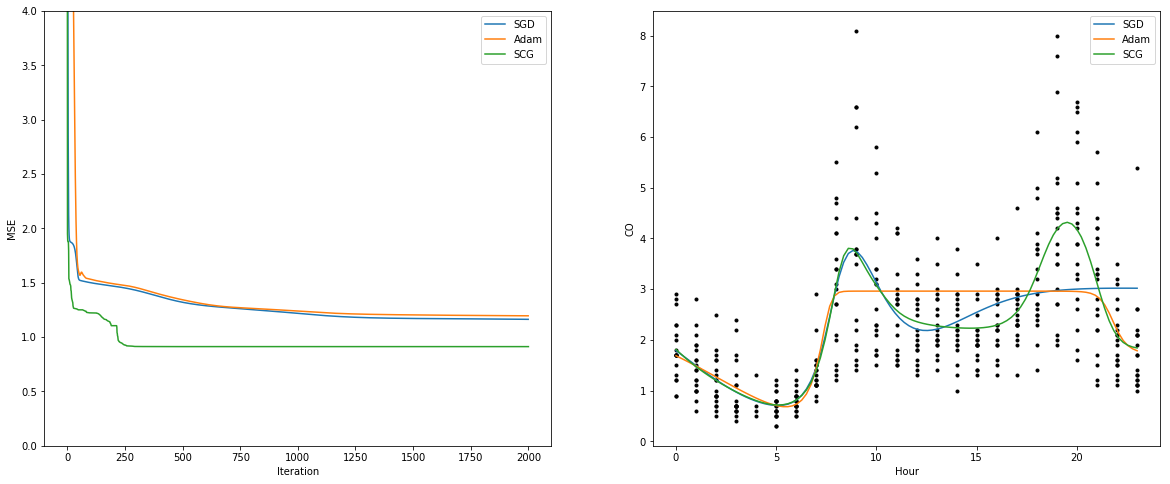

In [11]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(result_sgd['ftrace'], label='SGD')
plt.plot(result_adam['ftrace'], label='Adam')
plt.plot(result_scg['ftrace'], label='SCG')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0, 4)

plt.subplot(1, 2, 2)
if standardize:
    plt.plot(X * X_std + X_mean, T, 'k.')  # unstandardize X
else:
    plt.plot(X, T, 'k.')
xs = np.linspace(0, 23, 100).reshape((-1, 1))
xs_standardized = (xs - X_mean) / X_std if standardize else xs
plt.plot(xs, network(result_sgd['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SGD')
plt.plot(xs, network(result_adam['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='Adam')
plt.plot(xs, network(result_scg['w'], n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, xs_standardized), label='SCG')
plt.legend()
plt.xlabel('Hour')
plt.ylabel('CO');

We can see that SCG has a Lower Error than Adam and SGD in MSE vs Interation graph but that may change depending on the weights taken initially as we are mainly concerned with the local minimum. 
In the other graph we see how  the models fit the distribution of the data and we see that SGD and SCG are quite similar while Adam is a bit different in some aspect.

Below is the code for different learning rates for different itenatons  and a different number of hidden layers and error rate.

In [12]:
results = []
for n_iterations in [10, 20,30,100]:
    for nh1 in [1, 2,3]:
        for nh2 in [1, 2,3]:
            
            n_U = (n_inputs + 1) * nh1
            n_V = (nh1 + 1) * nh2
            n_W = (nh2 + 1) * n_outputs
            initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)

            result_scg = opt.scg(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                 n_iterations=n_iterations)
            results.append([n_iterations, nh1, nh2, 0, 'scg', result_scg['ftrace'][-1]])
            
            for lr in [1e-3, 1e-4,1e-5,1e-6]:
                
                result_sgd = opt.sgd(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=lr, momentum_rate=0)
                result_adam = opt.adam(initial_w, mse, error_gradient, fargs=[n_inputs, nh1, nh2, n_outputs, X, T],
                                       n_iterations=n_iterations, learning_rate=lr)
 
                results.append([n_iterations, nh1, nh2, lr, 'sgd', result_sgd['ftrace'][-1]])
                results.append([n_iterations, nh1, nh2, lr, 'adam', result_adam['ftrace'][-1]])

results = pandas.DataFrame(results, columns=('Iterations', 'nh1', 'nh2', 'lr', 'algo', 'mse'))
results

,Iterations,nh1,nh2,lr,algo,mse
0,10,1,1,0.000000,scg,1.476101
1,10,1,1,0.001000,sgd,6.665875
2,10,1,1,0.001000,adam,6.784935
3,10,1,1,0.000100,sgd,6.808298
4,10,1,1,0.000100,adam,6.820436
5,10,1,1,0.000010,sgd,6.822749
6,10,1,1,0.000010,adam,6.823965
7,10,1,1,0.000001,sgd,6.824196
8,10,1,1,0.000001,adam,6.824317
9,10,1,2,0.000000,scg,1.678905


So as we  decrease the Learning rate by keeping the number of iterations and hidden layers constant we see an increase in Error where as ,as the number of iterations increases along with number of units in HIdden layer1 and Hidden Layer2,keepng the learning rate high, we see a decrease in  Error. 


So here we get the best value for 100 iterations with 3 units in Hidden Layer1 and 3 units in Hidden Layer 2 and learning rate of 1e-3 , for Adam we get 6.798548, for SGD we get 5.787302 and for SCG we get 1.170786 

Below I have extracted the data on the basis of 'mse' and sorted them in ascending order.

In [13]:
A=results['mse']
A=np.array(A)
A.sort()
C=A[:20]
C

array([1.17078555, 1.22329268, 1.22463644, 1.22997848, 1.25187955,
       1.25413617, 1.2631561 , 1.28896791, 1.29189884, 1.29593326,
       1.30364431, 1.30364441, 1.3036447 , 1.30558467, 1.30595163,
       1.30612789, 1.31180968, 1.31671287, 1.31802967, 1.32293878])

In [50]:
X = np.arange(15).reshape((5, 3))
T = np.hstack((X[:, 0:1] * 0.1 * X[:, 1:2], X[:, 2:]**2)) # making two target values for each sample
T = T.reshape((5, 2))
print('  Input            Target')
for x, t in zip(X, T):
    print(x, '\t', t)

  Input            Target
[0 1 2] 	 [0. 4.]
[3 4 5] 	 [ 1.2 25. ]
[6 7 8] 	 [ 4.2 64. ]
[ 9 10 11] 	 [  9. 121.]
[12 13 14] 	 [ 15.6 196. ]


Below is a test with 50 units in first hidden layer and 3 units in second hidden layer without the standardization step

In [51]:
n_hiddens_1 = 50
n_hiddens_2 = 3
n_iterations = 1000


n_inputs = X.shape[1]
n_outputs = T.shape[1]

n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs

initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)
print(f'SGD final error is {result_sgd["ftrace"][-1]:.3f} and it took {result_sgd["time"]:.2f} seconds')

result_adam = opt.adam(initial_w, 
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                       n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)
print(f'Adam final error is {result_adam["ftrace"][-1]:.3f} and it took {result_adam["time"]:.2f} seconds')

result_scg = opt.scg(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X, T],
                     n_iterations=n_iterations,
                     save_wtrace=True)
print(f'SCG final error is {result_scg["ftrace"][-1]:.3f} and it took {result_scg["time"]:.2f} seconds')

SGD final error is 2433.744 and it took 0.25 seconds
Adam final error is 3355.337 and it took 0.25 seconds
SCG final error is 133.609 and it took 0.38 seconds


Now we are testing the network with the received weights of w from SCG

In [52]:
w = result_scg['w']

Y = network(w, n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X)
Y.shape

(5, 2)

Now we are plotting the graph of MSE vs Iteration of SCG and Prediction vs Target of Y1 and Y2

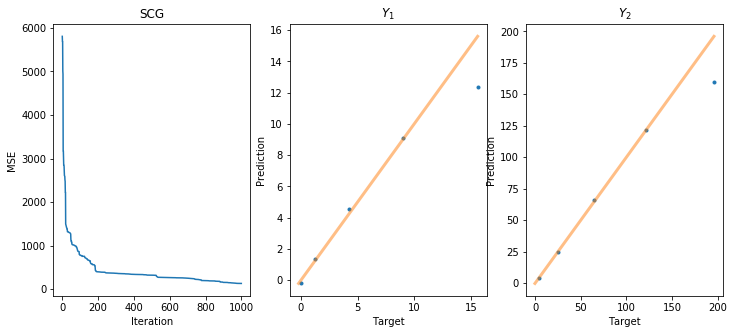

In [53]:


def plot_diagonal(T, Y):
    a = min(T.min(), Y.min())
    b = max(T.max(), Y.max())
    plt.plot([a, b], [a, b], '-', lw=3, alpha=0.5)

plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.plot(result_scg['ftrace'])
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.title('SCG')

plt.subplot(1, 3, 2)
plt.plot(T[:, 0], Y[:, 0], '.')
plot_diagonal(T[:, 0], Y[:, 0])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_1$')

plt.subplot(1, 3, 3)
plt.plot(T[:, 1], Y[:, 1], '.')
plot_diagonal(T[:, 1], Y[: 1])
plt.xlabel('Target')
plt.ylabel('Prediction')
plt.title('$Y_2$');

Below is the extra credit part. We first take the hours in X and CO in T and we standardize X  

In [54]:
data = pandas.read_csv('AirQualityUCI.csv', delimiter=';', decimal=',', usecols=range(15), na_values=-200)
data = data[['Time', 'CO(GT)']]
data = data [:23 * 20]  # first 20 days of data
data = data.dropna(axis=0)
print('data.shape =', data.shape)

hour = [int(t[:2]) for t in data['Time']]
X1 = np.array(hour).reshape(-1, 1)
CO = data['CO(GT)']
T1 = np.array(CO).reshape(-1, 1)
initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1
standardize = True

if standardize:
    X1_mean = X1.mean(axis=0)
    X1_std = X1.std(axis=0)
    
    X1 = (X1 - X1_mean) / X1_std
    
print(f'X mean is {X1.mean(axis=0)[0]:.3f} and its standard deviation is {X1.std(axis=0)[0]:.3f}')


data.shape = (443, 2)
X mean is 0.000 and its standard deviation is 1.000


We  use adam to train the weights  and then use the same weights to predict the CO values from  random values of time

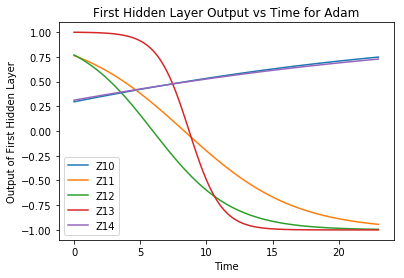

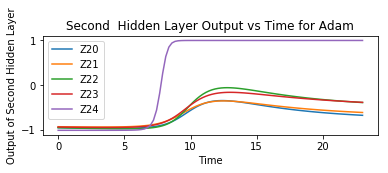

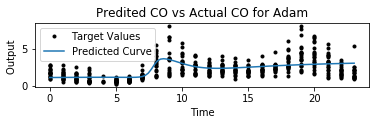

In [56]:
n_hiddens_1 = 5
n_hiddens_2 = 5
n_iterations = 1000


n_inputs = X1.shape[1]
n_outputs = T1.shape[1]
initial_w = np.random.uniform(-0.1, 0.1, n_U + n_V + n_W)  # range of weights is -0.1 to 0.1

n_U = (n_inputs + 1) * n_hiddens_1
n_V = (n_hiddens_1 + 1) * n_hiddens_2
n_W = (n_hiddens_2 + 1) * n_outputs
result_adam = opt.adam(initial_w,
                       mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X1, T1],n_iterations=n_iterations, learning_rate=1e-2, 
                       save_wtrace=True)

#print(f' Adam  output  is {result_adam["w"]}')
#Y,Z_1,Z_2=network(w, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, X,all_outputs=True)
#print(Z_1)
w2=result_adam["w"]
xs = np.linspace(0, 23, 100).reshape((-1, 1))
xs_standardized = (xs - X_mean) / X_std if standardize else xs
Y,Z_1,Z_2=network(w2, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, xs_standardized,all_outputs=True)
plt.figure()
plt.subplot(1, 1, 1)
plt.plot(xs,Z_1)
L=()
for i2 in range(len(Z_1[0])):
    L=L+('Z1'+str(i2),)
plt.gca().legend(L)
plt.xlabel('Time')
plt.ylabel('Output of First Hidden Layer')
plt.title('First Hidden Layer Output vs Time for Adam')

plt.show()
plt.subplot(2,1,1)
plt.plot(xs,Z_2)
L=()
for i2 in range(len(Z_1[0])):
    L=L+('Z2'+str(i2),)
plt.gca().legend(L)
plt.xlabel('Time')
plt.ylabel('Output of Second Hidden Layer')
plt.title('Second  Hidden Layer Output vs Time for Adam')

plt.show()
plt.subplot(3,1,1)
plt.plot((X1 * X1_std + X1_mean),T1,'k.',label='Target Values')
plt.plot(xs,Y,label='Predicted Curve')
plt.xlabel('Time')
plt.ylabel('Output ')
plt.title('Predited CO vs Actual CO for Adam')
plt.legend()
plt.show()


So we see in the graph of Output of first Hidden Layer , the outputs are slowly improving to get the Error minimised  and also in a certain direction. Same goes for output of the Second Hidden Layer. And for the Predicted vs Target values we see a curve going that fits quite a few of the data points.

Below is the graph of Scond Hidden Layer Output vs Time (enlarged view) for Adams Function

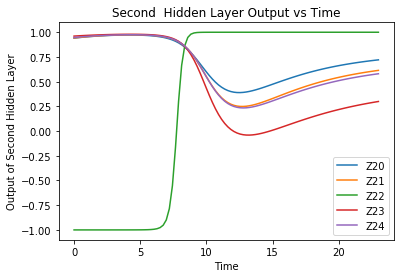

In [48]:
plt.plot(xs,Z_2)
L=()
for i2 in range(len(Z_1[0])):
    L=L+('Z2'+str(i2),)
plt.gca().legend(L)
plt.title('Second  Hidden Layer Output vs Time')
plt.xlabel('Time')
plt.ylabel('Output of Second Hidden Layer')
plt.show()

Below is the graph of predicted vs actual CO level

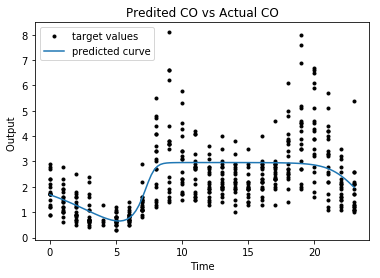

In [44]:
plt.plot((X1 * X1_std + X1_mean),T1,'k.',label='target values')
plt.plot(xs,Y,label='predicted curve')
plt.title('Predited CO vs Actual CO')
plt.xlabel('Time')
plt.ylabel('Output ')
plt.legend()
plt.show()

Below is the same thing done with SGD with the same parameters as above

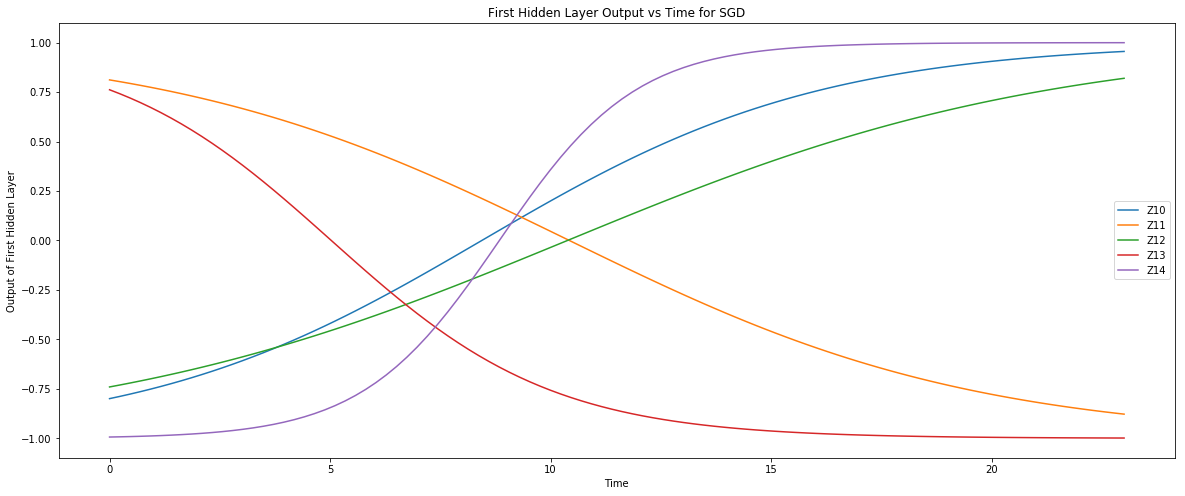

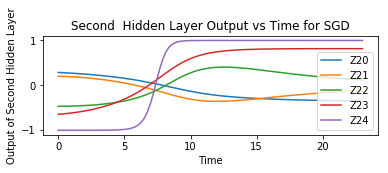

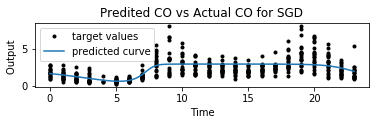

In [45]:
result_sgd = opt.sgd(initial_w,
                     mse, error_gradient, fargs=[n_inputs, n_hiddens_1, n_hiddens_2, n_outputs, X1, T1],
                     n_iterations=n_iterations, learning_rate=1e-1, momentum_rate=0.2, 
                     save_wtrace=True)

w3=result_sgd["w"]
xs1 = np.linspace(0, 23, 100).reshape((-1, 1))
standardize=True
xs1_standardized = (xs1 - X1_mean) / X1_std if standardize else xs
Y1,Z_11,Z_21=network(w3, n_inputs, n_hiddens_1,n_hiddens_2, n_outputs, xs1_standardized,all_outputs=True)
plt.figure(figsize=(20,8))
plt.subplot(1, 1, 1)
plt.plot(xs1,Z_11)
L=()
for i2 in range(len(Z_1[0])):
    L=L+('Z1'+str(i2),)
plt.gca().legend(L)
plt.xlabel('Time')
plt.ylabel('Output of First Hidden Layer')
plt.title('First Hidden Layer Output vs Time for SGD')

plt.show()
plt.subplot(2,1,1)
plt.plot(xs1,Z_21)
L=()
for i2 in range(len(Z_1[0])):
    L=L+('Z2'+str(i2),)
plt.gca().legend(L)
plt.xlabel('Time')
plt.ylabel('Output of Second Hidden Layer')
plt.title('Second  Hidden Layer Output vs Time for SGD')

plt.show()
plt.subplot(3,1,1)
plt.plot((X1 * X1_std + X1_mean),T1,'k.',label='target values')
plt.plot(xs1,Y,label='predicted curve')
plt.xlabel('Time')
plt.ylabel('Output ')
plt.title('Predited CO vs Actual CO for SGD')
plt.legend()
plt.show()

Same thing is observed as with adams